#### *Cristina Cosma*

# **DATA SCIENCE**

## **Sprint 4 : Utilitzar les biblioteques de visualització de dades Matplotlib o Seaborn**

## Tasca M4 T02 - Visualització gràfica de múltiples variables.

* Visualització gràfica de Multiples variables.
* Representació de Categorical Data.
* Ús dels Box-Plots.
* Ús dels regex

___________
Lliurament:Enviar l'URL a un repositori anomenat *Visualització gràfica de Multiples variables* que contingui la solució. S'ha d'entregar cada exercici en un mateix fitxer i en un repositori.

URL : **https://github.com/CristinaCosma/Visualitzacio_grafica_multiples_variables** 
___________

## EXERCICI 1 : 
Realitza la pràctica del notebook a GitHub **"03 EXAMINING DATA"** (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.

* GitHub "03 EXAMINING DATA" : 
    https://github.com/BIDDL3/Examining-Data/blob/main/03%20EXAMINING%20DATA.ipynb
* La práctica s'ha fet i estàdisponible dins el mateix repositori que els exercicis 2 i 3

## EXERCICI 2 : 
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub **PRE-PROCESSING-DATA** amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

El **resultat final** ha de ser un dataframe amb les variables de **nom de la pel·lícula, any i genere**. També és important quedar-se amb **un sol gènere per a cada pel·lícula!**

* Importem els fitxers del GitHub "PRE-PROCESSING-DATA" : https://github.com/BIDDL3/PRE-PROCESSING-DATA/blob/main/movies.dat
* Per importar-lo i trballar, primer convertim el fitxer original segons aquest exemple : https://support.talexio.com/hc/en-us/articles/4410548257298-How-to-convert-dat-files-to-csv
* Obrim el fitxer **movies.dat -> movies.txt -> movies.csv** obrant-lo amb l'editor de text i salvant-lo com a .csv
* Importem les llibreries que poden ser útils i el propi fitxer *movies.csv*

    movie.dat

    1::Toy Story (1995)::Animation|Children's|Comedy
    2::Jumanji (1995)::Adventure|Children's|Fantasy
    3::Grumpier Old Men (1995)::Comedy|Romance
    4::Waiting to Exhale (1995)::Comedy|Drama
    5::Father of the Bride Part II (1995)::Comedy
    6::Heat (1995)::Action|Crime|Thriller
    7::Sabrina (1995)::Comedy|Romance
    8::Tom and Huck (1995)::Adventure|Children's
    9::Sudden Death (1995)::Action
    10::GoldenEye (1995)::Action|Adventure|Thriller


**Preparació i neteja de les dades :**
* Des del editor de text i des del Excel, observem que el dataset no té assignat cap nom a les columnes 
* El fitxer *movies.dat* original té una sola columna i que no té atribuït cap nom. 
* Les dades son molt compactades i s'han de reorganitzar per poder-les analitzar estadísticament
* Per això des de la importació i la primera lectura, fem servir comandes per separar les paraules i estructurar-les per columnes.

In [13]:
import numpy as np
import pandas as pd
import re # regex

In [31]:
movies_raw= pd.read_csv('C:/Users/Buba/Documents/CURSOS-PROGRAMACION/IT-Academy/IT-DATA-SCIENCE/DS-Sprint4_B_data-processing/PRE-PROCESSING-DATA_Cristina_DS/movies.csv', 
                      sep = "::", encoding_errors= 'replace', engine='python', names=['Id','Name_Year', 'Genre'])

# Alternativa : movies_raw=pd.read_csv('movies.csv')

* Veiem l'estructura del dataframe i les columnes adjudicades manualment
* L'Any està junt amb el nom i el gènere conté entre 1 i múltiples entrades 

In [17]:
movies_raw[:0]

,Id,Name_Year,Genre


In [15]:
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         3883 non-null   int64 
 1   Name_Year  3883 non-null   object
 2   Genre      3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [32]:
# movies_raw.csv 
movies_raw

,Id,Name_Year,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [90]:
movies_raw['Genre'].nunique()

18

**Neteja i reestructuració**:
* Neteja i separació de la columna de l'any dels films ("Name_Year" i posteriorment, "Year")
* L'Any està junt amb el nom i el gènere conté entre 1 i múltiples entrades 

In [33]:
print(movies_raw['Name_Year'].str[-6:]) # ver 6 digitos desde la cola

0       (1995)
1       (1995)
2       (1995)
3       (1995)
4       (1995)
         ...  
3878    (2000)
3879    (2000)
3880    (2000)
3881    (2000)
3882    (2000)
Name: Name_Year, Length: 3883, dtype: object


In [34]:
# separem l'any del nom
print(movies_raw['Name_Year'].str[-5:-1]) # start:stop desde la cola omitiendo los parántesis

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: Name_Year, Length: 3883, dtype: object


In [64]:
movies_raw['Year']=movies_raw['Name_Year'].str[-5:-1]
movies_raw.head()

,Id,Name_Year,Genre,Year,Name,Genre2
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,Animation
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale,Comedy
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II,Comedy


In [65]:
print(movies_raw['Name_Year'].str[:-7])

0                         Toy Story
1                           Jumanji
2                  Grumpier Old Men
3                 Waiting to Exhale
4       Father of the Bride Part II
                   ...             
3878               Meet the Parents
3879            Requiem for a Dream
3880                      Tigerland
3881               Two Family House
3882                 Contender, The
Name: Name_Year, Length: 3883, dtype: object

In [61]:
movies_raw['Name'] = movies_raw['Name_Year'].str[:-7]

* Convertim la variable "Year" en una numèrica i que no tingui molt de pès
* Fem ús d'una "regex function" lleugera per truncar les dades de la columna "Genre" 
* Ens quedem només amb la primera paraula del tipus de peli "Genre" 

In [69]:
movies_raw['Year']=movies_raw['Year'].astype('int32')

# Alternativament : => movies_raw['Year'].apply(pd.to_numeric)

In [70]:
movies_raw['Genre'] = movies_raw['Genre'].str.split("|", 1).str[0]

In [73]:
movies_raw

,Id,Name_Year,Genre,Year,Name,Genre2
0,1,Toy Story (1995),Animation,1995,Toy Story,Animation
1,2,Jumanji (1995),Adventure,1995,Jumanji,Adventure
2,3,Grumpier Old Men (1995),Comedy,1995,Grumpier Old Men,Comedy
3,4,Waiting to Exhale (1995),Comedy,1995,Waiting to Exhale,Comedy
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II,Comedy
...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,Meet the Parents,Comedy
3879,3949,Requiem for a Dream (2000),Drama,2000,Requiem for a Dream,Drama
3880,3950,Tigerland (2000),Drama,2000,Tigerland,Drama
3881,3951,Two Family House (2000),Drama,2000,Two Family House,Drama


* Finalment, reordenem les columnes amb la funció **reindex()** de Pandas DataFrame
* Ja tenim un Pandas DataFrame reordenat que es diu **"movies_OK"**

In [82]:
movies_OK = movies_raw.reindex(columns = ['Id', 'Name', 'Year', 'Genre'])
print('\n"Ja tenim un Pandas DataFrame reordenat que es diu "movies_OK" :\n')

movies_OK


"Ja tenim un Pandas DataFrame reordenat que es diu "movies_OK" :



,Id,Name,Year,Genre
0,1,Toy Story,1995,Animation
1,2,Jumanji,1995,Adventure
2,3,Grumpier Old Men,1995,Comedy
3,4,Waiting to Exhale,1995,Comedy
4,5,Father of the Bride Part II,1995,Comedy
...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy
3879,3949,Requiem for a Dream,2000,Drama
3880,3950,Tigerland,2000,Drama
3881,3951,Two Family House,2000,Drama


In [84]:
movies_OK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      3883 non-null   int64 
 1   Name    3883 non-null   object
 2   Year    3883 non-null   int32 
 3   Genre   3883 non-null   object
dtypes: int32(1), int64(1), object(2)
memory usage: 106.3+ KB


In [89]:
movies_OK.nunique()

Id       3883
Name     3841
Year       81
Genre      18
dtype: int64

In [83]:
movies_OK['Genre'].unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

**Objectius complerts :**
* El **resultat final** es un dataframe amb les variables de **nom de la pel·lícula, any i genere**

* També ens hem quedat amb **un sol gènere per pel·lícula, amb un total de 18 gèneres** en cop de cents de combinacions

* Podem exportar-lo com a .csv per a usos futurs 


In [ ]:
# exportar a csv para cargar desde el entorno :
movies_OK.to_csv(movies_OK, sep='\t', encoding='utf-8')

# Alternativa de exportar a una ruta : df.to_csv (r'C:\Users\Cristina\Folder\dataframe.csv', index = None, header=True) 

## EXERCICI 3 : 
Mostra la teva creativitat i mostra què creus rellevant del Dataset de l'exercici anterior. 

Fes una o dues representacions gràfiques i justifica la teva elecció.

* Treballarem amb el dataset pulit : **"movies_OK"**

In [164]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
movies_OK

,Id,Name,Year,Genre
0,1,Toy Story,1995,Animation
1,2,Jumanji,1995,Adventure
2,3,Grumpier Old Men,1995,Comedy
3,4,Waiting to Exhale,1995,Comedy
4,5,Father of the Bride Part II,1995,Comedy
...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy
3879,3949,Requiem for a Dream,2000,Drama
3880,3950,Tigerland,2000,Drama
3881,3951,Two Family House,2000,Drama


In [162]:
data=movies_OK.groupby(['Year', 'Genre'])['Genre'].count()
data

Year  Genre    
1919  Action        1
      Adventure     1
      Comedy        1
1920  Comedy        2
1921  Action        1
                   ..
2000  Drama        36
      Horror        4
      Romance       1
      Sci-Fi        2
      Thriller      6
Name: Genre, Length: 623, dtype: int64

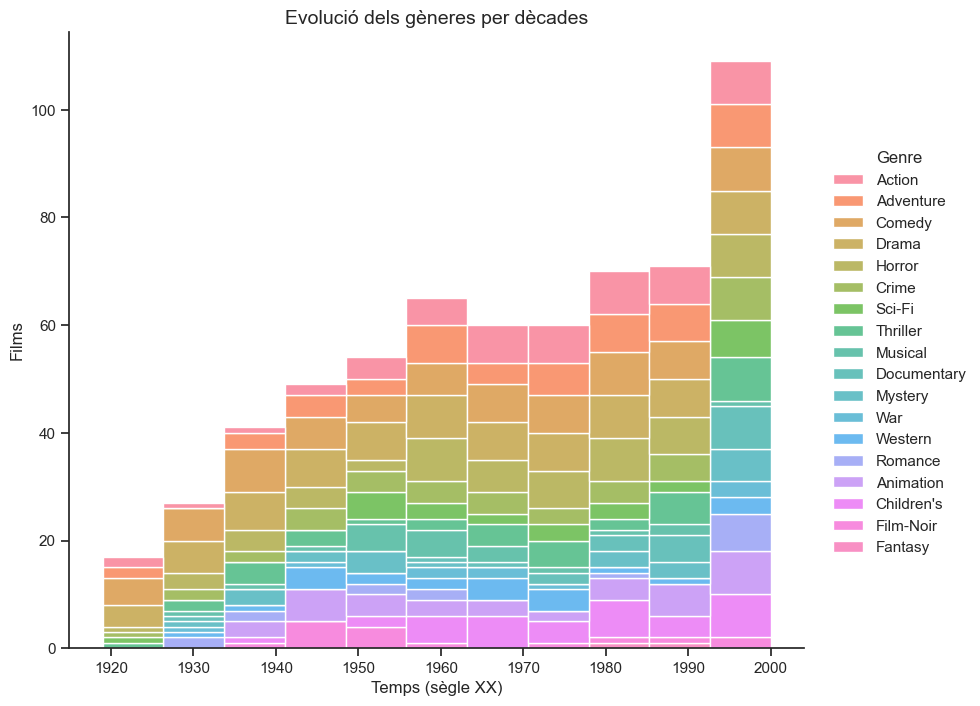

In [171]:
sns.displot(data, x="Year", hue="Genre", multiple="stack", height=7, aspect=1.2)

plt.title('Evolució dels gèneres per dècades', fontsize=14)
plt.xlabel('Temps (sègle XX)', fontsize=12)
plt.ylabel('Films', fontsize=12)

plt.show()

* **Del gràfic anterior podem treure les següents conclusions:**
    - Mai com desde la meitat dels anys '90 fins al 2000 no hi ha hagut tantes pel·licules. Observem que el mercat es dispara (podriem dir gairebé que n'hi a mólt de tot) : es l'època on més equilibri hi ha entre els diferents gènres, excepte per les categories *fantasia, western, misteri i musical*, on n'hi han menys producció.
    - Podriem pensar que amb aixó, la gent ha esdevingut mòlt més sedentària, i també els infants, per qui s'ha disparat l'oferta.
    - Les categories *drama* i *comèdia* son les que més temps han aguantat des del principi del cinèma i han sigut sent els genres mès prolífers : ocupan una plaça important encara. La diferència es que des de la meitat dels anys '30 i especialment els '60, el cinema s'ha diversificat mólt, sobretot amb cine de negre, cine d'acció, d'aventura i películes per a nens, que apareix als anys 30' i '40.
    - Als anys '50 apareix la ciència ficciò i els thrillers ; als '60, el cine de terror.
    - Des dels '90 el cine negre, l'animació i el cinema infantil han estat en auge i més recentment, del 1990al 2000, també han augmentat gñeneres com el romance, els documentals, els thrillers i el cine policial. 
    - Els que més han disminuït son els musicals i el cine de fantasia, gairebé desapareguts.
    - Per el dibuixos animats, les millores èpoques han sigut els anys '40 i des del 1985 aprox, endavant.

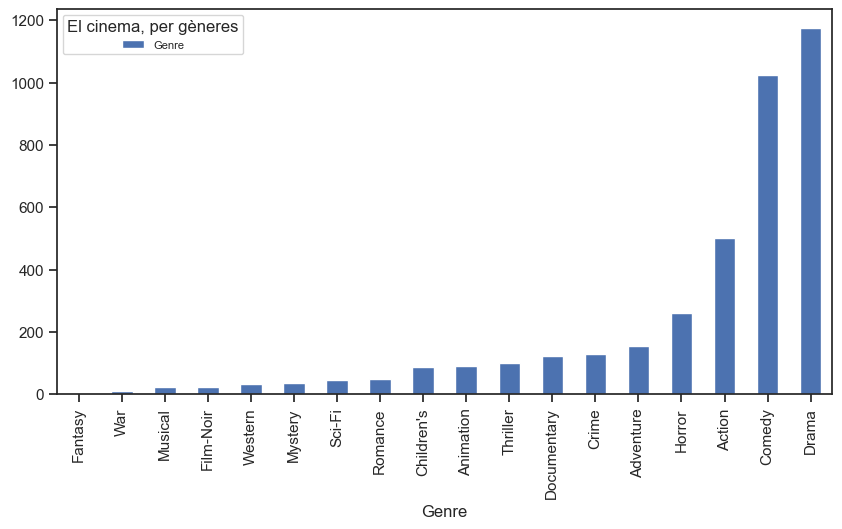

In [172]:
data=movies_OK.groupby(['Genre'])['Genre'].count()

data.sort_values(ascending=True).plot(kind="bar", figsize = (10,5))
plt.legend(title="El cinema, per gèneres", loc="upper left", fontsize=8) 

plt.show()

* **Del gràfic anterior i del següent podem dir:**
    - Les dues categories més productives han sigut la comedia i el drama, que tenen que veure amb les ganes de riure, però per una altra banda, amb la preocupació, l'angustia i la solució de diversos problemes.
    - Els gèneres d'acció i el cine de por, també son una part important del mercat.
    - Els altres gèneres han sigut minoritaris a la historia del cine.


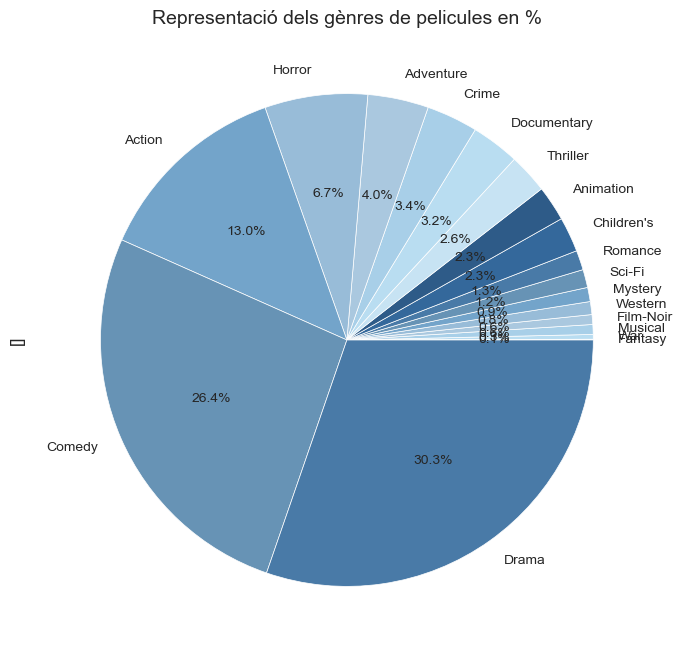

In [176]:
data.sort_values(ascending=True).plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=10, 
                                           colors=colors, wedgeprops={"linewidth" : 0.5, "edgecolor" : "white"})
plt.title('Representació dels gènres de pelicules en %', fontsize=14)
plt.ylabel([])  

# Exportar el gràfic:
plt.savefig('Sprint4_1.png', dpi=150, transparent=True)  

plt.show()

* **Del gràfic de percentatges veiem:**
    - Les dues categories més productives han sigut la comedia i el drama, que juntes represetnten més de la meitat del cinema del segle XX.
    - Aquestes dues més acció suman el 2/3 del que es produieix i si hi sumem el cine de por ja entre els quatre, és més de 3/4 del mercat.
    - Els altres gèneres han sigut minoritaris a la historia del cine.
